<a href="https://colab.research.google.com/github/Machine-Learning-Tokyo/Reinforcement_Learning/blob/master/session%20%231/maze_walker_rl_code/RL_MazeWalker_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Tokyo ##
### Introduction to Reinforcement Learning - Maze Walker ###
### Session - 1 ###

<h4 style="color:red">Introduction</h4>
Reinforcement learning is a concept, where in **Agent** learns to take **Action** based on the **State** of the environment. The objective of the agent to maximize the long-term **rewards** that it gets by taking actions, and observing the outcomes as a feedback from the environment.

We have already seen some basic equations for RL. For ref they are mentioned below

<h4 style="color:red">Basic Equations</h4>

- <b style="color:blue">Policy</b>
 
$policy = \pi(a|s)$

- <b style="color:blue">State Value</b>
  
$v(s) = \sum_a\pi(a|s)q_\pi(a,\hat{s})$
 
- <b style="color:blue">Action Value</b>
 
$q_\pi(a,s) = \sum_\hat{s}\sum_r(p(\hat{s},r|s,a) * (r + \gamma*v(\hat{s}))$

- <b style="color:blue">Combining above equations in 1 continous equation</b>
 
$q_\pi(a,s) = \sum_a\pi(a|s)(\sum_\hat{s}\sum_r[p(\hat{s},r|s,a) * (r + \gamma*v(\hat{s})])$

<h4 style="color:red">Current Problem Statement</h4>

- <b style="color:blue">Objective</b>

 - Find the best path to reach the **GOAL**.
 - And doing so, it needs to also avoid the **OBSTABLES** which are (**TREE & MAN**) in the path to the goal.

- <b style="color:blue">State</b>
 
 - The state's are defined by location on the board. Location are marked `[0,0]` being `top-left` and similarly `[3,3]` being `bottom-right`

- <b style="color:blue">Action</b>
 
 - When in a particular state, the agent can take one of these actions `["RIGHT", "LEFT", "UP", "DOWN"]`. Inline with **MARKOV PRINCIPLE**, next state is dependent on the current state and the action taken in that state.

- <b style="color:blue">Reward Structure</b>

 - An Agent gets **-1 reward** for every step it takes
 
 - If by taking an action, the agent hits an OBSTABLE, then the **reward is -10**
 
 - If by taking an action, agent falls out of the board, it get a **-1 reward**, however, remains as the same state.
 
 - If by taking an action, agent reaches the GOAL, then the **reward is +10**.
 

In [1]:
### Area where we download the required files from gdrive ####
### Uncomment the below code to download source library files ####
'''
!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/Reinforcement_Learning/master/session%20%231/maze_walker_rl_code/environment.py
!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/Reinforcement_Learning/master/session%20%231/maze_walker_rl_code/policyIteration.py
!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/Reinforcement_Learning/master/session%20%231/maze_walker_rl_code/valueIteration.py
'''

'\n!wget <Environment File>\n!wget <policyiteration File>\n!wget <valueiteration File>\n'

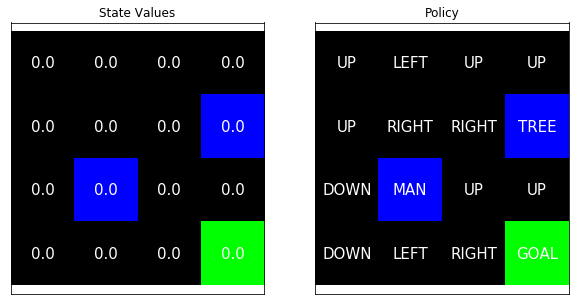

None

In [9]:
from environment import *
env = Env()
env.draw_board(env.state_value,env.policy)

<h4 style="color:red">What can be inferred from the problem statement</h4>

- <b style="color:blue">RL TASK</b>
 
 - **EPISODIC** : It is clear from the description above that it is an episodic task, which would end when the agent is able to reach the **GOAL**
 
- <b style="color:blue">POLICY TYPE </b>

 - **DETERMINISTIC** : As we know policy is explained as $\pi(a | s)$, this means the probability of taking an action when in a particular state. Also we know there are only 4 possible actions. As shown above, for `[0,0]` the default policy is `DOWN`, therefore,
 
   $\pi(a = "Down" |  s = [0,0]) = 1.0$
   
   $\pi(a = "Right" |  s = [0,0]) = 0.0$
   
   $\pi(a = "Left" |  s = [0,0]) = 0.0$
   
   $\pi(a = "Up" |  s = [0,0]) = 0.0$
   
- <b style="color:blue">RL Modeling Algorithm</b>
  
 - **Model Based methods** : There are some limited number of `STATES`, `ACTION` and `REWARD` structure that we see with this problem statement. So we can use simple **Model Based Methods** to build a **MAZE WALKER**
 
   
- <b style="color:blue">Note</b>
  
 - Please note, the above is a starting state values we selected (that is same value 0 for all states) and a random selection of action at each state described in the policy - **ARBITARY POLICY**

<h4 style="color:red">Exploring the environment</h4>

- Object variables available
 - `policy` = The current policy being followed
 - `state_value` = The current state values


- Functions available
 - `draw_policy(policy)`
   - Shows the current policy in a text format
   - `return None`
  
 - `draw_state_value(state_value)`
   - Shows the current state values in a text format 
   - `return None`
   
 - `draw_board(state_value,policy)`
   - Display the board in the manner seen above
   - `return None`
 
 - `get_next_state_and_reward(state,action)`
   - Based on the state and action given, provides the next_state and reward
   - `return next_state, reward`

In [4]:
env.policy

array([['UP', 'RIGHT', 'LEFT', 'UP'],
       ['RIGHT', 'UP', 'LEFT', 'TREE'],
       ['DOWN', 'MAN', 'RIGHT', 'UP'],
       ['RIGHT', 'RIGHT', 'UP', 'GOAL']], dtype='<U5')

In [5]:
env.state_value

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
env.draw_policy(env.policy)

[['UP' 'RIGHT' 'LEFT' 'UP']
 ['RIGHT' 'UP' 'LEFT' 'TREE']
 ['DOWN' 'MAN' 'RIGHT' 'UP']
 ['RIGHT' 'RIGHT' 'UP' 'GOAL']]


In [7]:
env.draw_state_value(env.state_value)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [10]:
env.get_next_state_and_reward([1,0], "UP")

((0, 0), -1)